In [629]:
import twitter
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import consumer_secret, consumer_key, access_token_key, access_token_secret, bearer

In [630]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_token_secret)

# Creation of the actual interface, using authentication
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [631]:
def twittercompany(handle):
    tweets = tweepy.Cursor(api.user_timeline, screen_name=handle, tweet_mode="extended").items()
    tweets_json = []
    for tweet in tweets:
        tweets_json.append(tweet)

    text=[]
    favorites = []
    retweets = []
    tweetdate = []
    for tweet in range(0,len(tweets_json)):
        #text
        textj = tweets_json[tweet].full_text
        text.append(textj)
        #favorites
        favoritesj = tweets_json[tweet].favorite_count
        favorites.append(favoritesj)
        #retweets
        retweetsj = tweets_json[tweet].retweet_count
        retweets.append(retweetsj)
        #date
        datej = tweets_json[tweet].created_at
        tweetdate.append(datej)

    frame = pd.DataFrame({"Text": text, "Favorites": favorites, "Retweets": retweets, "Date": tweetdate})

    frame["DOW"] = pd.to_datetime(frame["Date"]).dt.weekday
    frame = frame[frame.DOW < 5]

    frame["Date"] = pd.to_datetime(frame["Date"])
    frame["Date"] = frame["Date"].dt.date
    bydate = frame.groupby(["Date"]).sum()
    bydate['Datevalue'] = bydate.index.astype(str)
    bydate['Datevalue'] = bydate['Datevalue'].str.replace('\D', '').astype(int)
    
    return bydate

In [632]:
industries = pd.read_csv("https://raw.githubusercontent.com/zpwenz/Project-1---Fortune-500-twitter-use/ZA/ticker_list.csv")
fvts = []
rts = []
try:
    for handle in industries["Twitter Handle"].head(25):
        ctwitter = twittercompany(handle)
        mean_f = ctwitter["Favorites"].mean()
        mean_r = ctwitter["Retweets"].mean()
        fvts.append(mean_f)
        rts.append(mean_r)
except:
    fvts.append(0)
    rts.append(0)
frame_c = pd.DataFrame({"Handle": industries["Twitter Handle"].head(25), "Favorites": fvts, "Retweets": rts})
frame_c

Rate limit reached. Sleeping for: 384
Rate limit reached. Sleeping for: 408


ValueError: array length 15 does not match index length 25

In [633]:
frame_c

,Handle,Favorites,Retweets
0,walmart,1638.419355,615.354839
1,exxonmobil,172.273942,121.187082
2,Apple,NaN,NaN
3,BHHSRealEstate,9.677355,10.095190
4,McKesson,5.028409,4.198864


In [92]:
twitter = twittercompany("Nike")

,Favorites,Retweets,DOW,Datevalue
Date,,,,
2018-01-22,3,1,0,20180122
2018-01-23,2713,3168,9,20180123
2018-01-24,17,8,24,20180124
2018-01-25,13,18,21,20180125
2018-01-26,25,4,60,20180126
...,...,...,...,...
2019-12-10,860,229,10,20191210
2019-12-11,18,2,8,20191211
2019-12-13,8,0,16,20191213


In [128]:
google = twittercompany("Google")

In [416]:
Disneytwitter = twittercompany("Disney")

In [251]:
Microsofttwitter = twittercompany("Microsoft")

In [265]:
Inteltwitter = twittercompany("intel")

In [386]:
#Apple does not tweet, creating dataframe with dates and all zeros
Appletwitter = Disneytwitter
Appletwitter["Retweets"] = 0
Appletwitter["Favorites"] = 0

In [444]:
Cocacolatwitter = twittercompany("CocaCola")

In [457]:
Amazontwitter = twittercompany("amazon")

In [472]:
Targettwitter = twittercompany("Target")
Verizontwitter = twittercompany("verizon")


In [93]:
import json
import requests
import pandas as pd
from config import stock_key
import pprint

In [485]:
def companystock(symbol):
    url = "https://www.alphavantage.co/"
    symbol = symbol
    query_url = url + "query?function=TIME_SERIES_DAILY&symbol=" + symbol +"&apikey=" + stock_key

    response = requests.get(url)
    stock_response = requests.get(query_url)
    stock_json = stock_response.json()

    stock_response = requests.get(query_url)

    stock_json = stock_response.json()
    stock_list =[]
    stock_info =[]
    for key, value in stock_json.items():
        stock_list.append([key,value])



    for key, value in stock_list[1][1].items():
        stock_day = []
        stock_day.append(key)
        for col, item in value.items():
            stock_day.append(item)
        stock_info.append(stock_day)

    df_stock_json = pd.DataFrame(stock_info)

    df_stock_json.columns =["Date", 'Open', 'High', 'Low', 'Close', 'Volume']
    
    close_list = []
    df_stock_json["Close"] =df_stock_json["Close"].astype(float)
    #df_stock_json["Close"] = (df_stock_json["Close"] - df_stock_json["Close"].mean())/df_stock_json["Close"].std()
    df_stock_json = df_stock_json.sort_values(by = "Date", ascending = True, )
    df_stock_json = df_stock_json.reset_index(drop=True)
    df_stock_json['Datevalue'] = df_stock_json['Date'].astype(str)
    df_stock_json['Datevalue'] = df_stock_json['Datevalue'].str.replace('\D', '').astype(int)

    return df_stock_json


In [95]:
stock = companystock("NKE")


,Date,Open,High,Low,Close,Volume,Datevalue
0,2019-07-29,87.6500,87.8700,87.1800,87.62,4387337,20190729
1,2019-07-30,86.8200,87.9108,86.3600,87.20,3562999,20190730
2,2019-07-31,87.0900,87.2700,85.5500,86.03,5818168,20190731
3,2019-08-01,85.2600,86.7700,82.7000,83.12,7871849,20190801
4,2019-08-02,82.5300,83.2400,80.7900,81.14,8761409,20190802
...,...,...,...,...,...,...,...
95,2019-12-11,96.9000,97.3200,96.6500,97.18,4292584,20191211
96,2019-12-12,97.3200,98.1800,96.9000,97.72,4762665,20191212
97,2019-12-13,97.4300,98.2900,96.9100,97.77,5247551,20191213
98,2019-12-16,98.1400,99.3400,98.0600,98.81,8211270,20191216


In [129]:
googlestock = companystock("GOOGL")

In [141]:
disneystock = companystock("DIS")

In [250]:
microsoftstock = companystock("MSFT")

In [266]:
intelstock = companystock("INTC")

In [375]:
applestock = companystock("AAPL")

In [445]:
cocacolastock = companystock("KO")

In [458]:
amazonstock = companystock("AMZN")

In [480]:
targetstock = companystock("TGT")
verizonstock = companystock("VZ")

In [492]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
def clean_tweet(tweet): 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
def get_tweet_sentiment(tweet): 
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(clean_tweet(tweet)) 
        # set sentiment 
        return analysis.sentiment.polarity
import datetime
import numpy as np

def sentimentdaily(search, startyear, startmonth, startday, endyear, endmonth, endday):
    start_date=datetime.date(startyear,startmonth,startday)
    end_date=datetime.date(endyear,endmonth,endday)
    difference= (end_date-start_date).days+1
    dates = []
    for d in range(difference):
            date = start_date+datetime.timedelta(d)
            dates.append(date)
    from searchtweets import ResultStream, gen_rule_payload, load_credentials
    premium_search_args = load_credentials(filename="credentials2.yml",
                     yaml_key="search_tweets_premium_example",
                     env_overwrite=True)
    from searchtweets import collect_results
    publict = []
    created_at = []
    sentiment = []
    means = []
    for n in range(0, len(dates)-1):
        rule = gen_rule_payload(search, results_per_call=100, from_date=str(dates[n]), to_date=str(dates[n+1]))
        public = collect_results(rule,
                             max_results=100,
                             result_stream_args=premium_search_args)        
        for tweet in public:
                publict.append(tweet.text)
        for tweet in range(1, len(publict)):
                sentiment.append(get_tweet_sentiment(clean_tweet(publict[tweet])))
        score = np.mean(sentiment)
        means.append(score)
    Sentimentbyday = pd.DataFrame({"Date": dates[:-1], "Sentiment": means})
    Sentimentbyday["DOW"] = pd.to_datetime(Sentimentbyday["Date"]).dt.weekday
    Sentimentbyday = Sentimentbyday[Sentimentbyday.DOW < 5]
    Sentimentbyday['Datevalue'] = Sentimentbyday['Date'].astype(str)
    Sentimentbyday['Datevalue'] = Sentimentbyday['Datevalue'].str.replace('\D', '').astype(int)
    return Sentimentbyday

In [101]:
sentiment = sentimentdaily("Nike", 2019, 11, 20, 2019, 12, 16)

In [130]:
sentimentgoogle = sentimentdaily("Google", 2019, 11, 20, 2019, 12, 16)

C:\Users\Owner\Anaconda3\lib\site-packages\searchtweets\credentials.py:34: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  search_creds = yaml.load(f)[yaml_key]


In [142]:
sentimentdisney = sentimentdaily("Disney", 2019, 11, 20, 2019, 12, 16)

In [252]:
sentimentmicrosoft = sentimentdaily("Microsoft", 2019, 11, 20, 2019, 12, 16)

C:\Users\Owner\Anaconda3\lib\site-packages\searchtweets\credentials.py:34: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  search_creds = yaml.load(f)[yaml_key]


In [270]:
sentimentintel = sentimentdaily("Intel", 2019, 11, 20, 2019, 12, 16)

Grabbing bearer token from OAUTH


In [367]:
sentimentapple = sentimentdaily("Apple", 2019, 11, 20, 2019, 12, 16)

C:\Users\Owner\Anaconda3\lib\site-packages\searchtweets\credentials.py:34: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  search_creds = yaml.load(f)[yaml_key]
Grabbing bearer token from OAUTH


In [446]:
sentimentcocacola = sentimentdaily("Coke", 2019, 11, 20, 2019, 12, 16)

C:\Users\Owner\Anaconda3\lib\site-packages\searchtweets\credentials.py:34: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  search_creds = yaml.load(f)[yaml_key]
Grabbing bearer token from OAUTH


In [459]:
sentimentamazon = sentimentdaily("Amazon", 2019, 11, 20, 2019, 12, 16)

C:\Users\Owner\Anaconda3\lib\site-packages\searchtweets\credentials.py:34: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  search_creds = yaml.load(f)[yaml_key]
Grabbing bearer token from OAUTH


In [488]:
sentimenttarget = sentimentdaily("Target", 2019, 11, 20, 2019, 12, 16)

C:\Users\Owner\Anaconda3\lib\site-packages\searchtweets\credentials.py:34: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  search_creds = yaml.load(f)[yaml_key]
Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH
retrying request; current status code: 429
retrying request; current status code: 429
retrying request; current status code: 429
HTTP Error code: 429: Exceeded rate limit
Rule payload: {'query': 'Verizon', 'maxResults': 100, 'toDate': '201911240000', 'fromDate': '201911230000'}


HTTPError: 

In [493]:
sentimentverizon = sentimentdaily("Verizon", 2019, 11, 20, 2019, 12, 16)

Grabbing bearer token from OAUTH


In [134]:
from pytrends.request import TrendReq
import time
import numpy as np
import random
def get_trends(search):
    pytrend = TrendReq(hl='en-US', tz=360)
    kw_list=[search]
    pytrend.build_payload(kw_list, cat=0, timeframe='today 3-m',geo='',gprop='')
    interest_over_time_df = pytrend.interest_over_time()
    time.sleep(random.randint(5, 10))

    interest_over_time_df["Date"] = interest_over_time_df.index

    interest_over_time_df.reset_index
    interest_over_time_df["DOW"] = pd.to_datetime(interest_over_time_df["Date"]).dt.weekday
    interest_over_time_df = interest_over_time_df[interest_over_time_df.DOW < 5]
    interest_over_time_df['Datevalue'] = interest_over_time_df['Date'].astype(str)
    interest_over_time_df['Datevalue'] = interest_over_time_df['Datevalue'].str.replace('\D', '').astype(int)
    interest_over_time_df["Google"] = interest_over_time_df[search]

    return interest_over_time_df

In [ ]:
trends = get_trends("Nike")


In [135]:
googletrends = get_trends("Google")

In [143]:
disneytrends = get_trends("Disney")

In [253]:
microsofttrends = get_trends("Microsoft")

In [271]:
inteltrends = get_trends("Intel")

In [368]:
appletrends = get_trends("Apple")

In [447]:
cocacolatrends = get_trends("Coca-Cola")

In [460]:
amazontrends = get_trends("Amazon")

In [494]:
targettrends = get_trends("Target")
verizontrends = get_trends("Verizon")

In [650]:
Trenddf = pd.DataFrame({"Amazon": [amazontrends["Google"].mean()], 
                        "Nike": [trends["Google"].mean()],
                        "Google": [googletrends["Google"].mean()],
                        "Disney": [disneytrends["Google"].mean()],
                        "Microsoft": [microsofttrends["Google"].mean()],
                        "Intel": [inteltrends["Google"].mean()],
                        "Apple": [appletrends["Google"].mean()],
                        "Coca-Cola": [cocacolatrends["Google"].mean()],
                        "Target": [targettrends["Google"].mean()],
                        "Verizon": [verizontrends["Google"].mean()]})

In [655]:
Trenddf = Trenddf.transpose()

In [666]:
Trenddf.columns = ["Trend"]

Text(0.5, 1.0, 'Search Volume by Company')

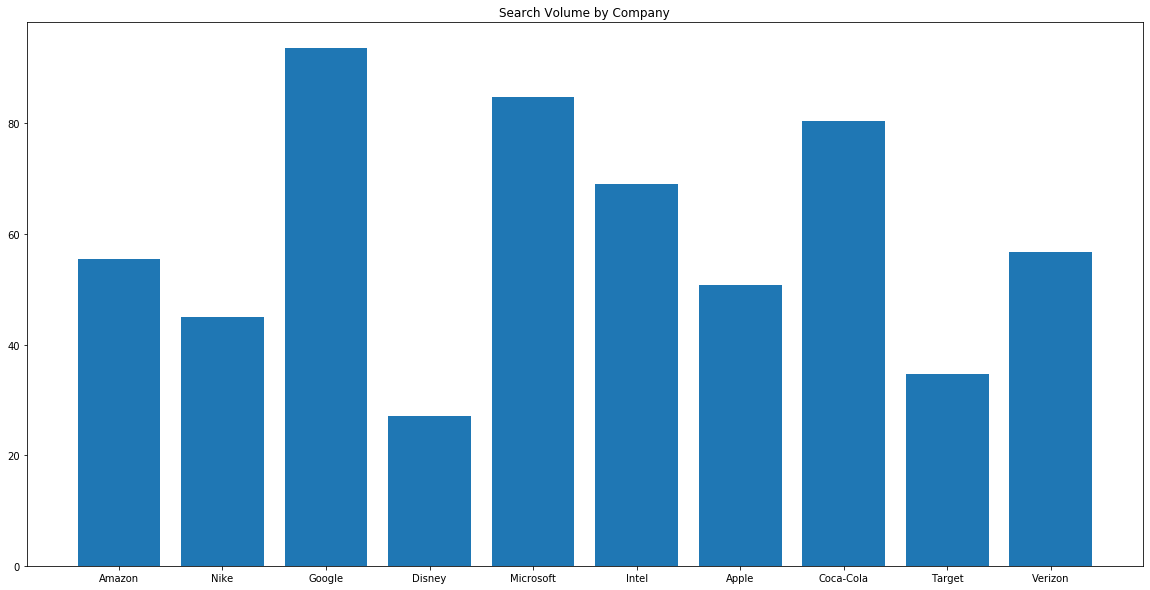

In [670]:
plt.figure(figsize=(20,10))
plt.bar(Trenddf.index, Trenddf["Trend"])
plt.title("Search Volume by Company")

In [425]:
def merge_dfs(twitter_df, stock_df, sentiment_df, trends_df):
    df1 = twitter_df.merge(stock_df, on = "Datevalue")
    df2 = df1.merge(sentiment_df, on ="Datevalue")
    total = df2.merge(trends_df, on = "Datevalue")
    total = total.drop(["DOW_x", "Date_x", "isPartial", "Date_y", "DOW_y"], axis = 1)

    total["Retweetsdb"] = total["Retweets"].shift(1)
    total["Favoritesdb"] = total["Favorites"].shift(1)
    total["Googledb"] = total["Google"].shift(1)
    total["Sentimentdb"] = total["Sentiment"].shift(1)
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler(feature_range=(5,95))
    total["Close"] = scaler.fit_transform(total[["Close"]])
    total["Sentimentdb"] = scaler.fit_transform(total[["Sentimentdb"]])
    total["Googledb"] = scaler.fit_transform(total[["Googledb"]])
    total["Retweetsdb"] = scaler.fit_transform(total[["Retweetsdb"]])
    total["Favoritesdb"] = scaler.fit_transform(total[["Favoritesdb"]])
    total = total.reset_index()
    return total

In [541]:
Nike = merge_dfs(twitter, stock, sentiment, trends)

In [427]:
Googledf = merge_dfs(google, googlestock, sentimentgoogle, googletrends)

In [428]:
Disneydf = merge_dfs(Disneytwitter, disneystock, sentimentdisney, disneytrends)

In [429]:
Microsoftdf = merge_dfs(Microsofttwitter, microsoftstock, sentimentmicrosoft, microsofttrends)

In [430]:
Inteldf = merge_dfs(Inteltwitter, intelstock, sentimentintel, inteltrends)

In [431]:
Appledf = merge_dfs(Appletwitter, applestock, sentimentapple, appletrends)

In [448]:
Cocacoladf = merge_dfs(Cocacolatwitter, cocacolastock, sentimentcocacola, cocacolatrends)

In [461]:
Amazondf = merge_dfs(Amazontwitter, amazonstock, sentimentamazon, amazontrends)

In [496]:
Targetdf = merge_dfs(Targettwitter, targetstock, sentimenttarget, targettrends)
Verizondf = merge_dfs(Verizontwitter, verizonstock, sentimentverizon, verizontrends)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

In [535]:
import statsmodels.api as sm # import statsmodels 
def lm_twitter(data):
    Y = data["Close"]
    Y = Y.drop(Y.index[0])
    X = data[['Favoritesdb', 'Retweetsdb', "Googledb", "Sentimentdb"]]
    X = X.drop(X.index[0])
    model = sm.OLS(Y, X).fit()
    return model.summary()

In [567]:
import statsmodels.api as sm # import statsmodels 
def lm_plot(data):
    Y = data["Close"]
    Y = Y.drop(Y.index[0])
    X = data[['Favoritesdb', 'Retweetsdb', "Googledb", "Sentimentdb"]]
    X = X.drop(X.index[0])
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    plt.scatter(predictions, Y, s=30, c='k', marker='+')
    plt.xlabel("Predicted Closing Price from model")
    plt.ylabel("Actual Closing Price")
    plt.show()

In [634]:
lm_twitter(Nike)

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.415
Model:                            OLS   Adj. R-squared (uncentered):              0.181
Method:                 Least Squares   F-statistic:                              1.773
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                       0.211
Time:                        18:00:48   Log-Likelihood:                         -72.661
No. Observations:                  14   AIC:                                      153.3
Df Residuals:                      10   BIC:                                      155.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Favoritesdb    -0.2878      1.506     -0.191      0.852      -3.644       3.069
Retweetsdb      0.3419      1.399      0.244      0.812      -2.776       3.460
Googledb        0.6175      0.505      1.223      0.249      -0.507       1.742
Sentimentdb     0.5249      0.330      1.592      0.142      -0.210       1.259
==============================================================================
Omnibus:                        8.972   Durbin-Watson:                   0.189
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                1.762
Skew:                           0.166   Prob(JB):                        0.414
Kurtosis:                       1.294   Cond. No.                         7.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

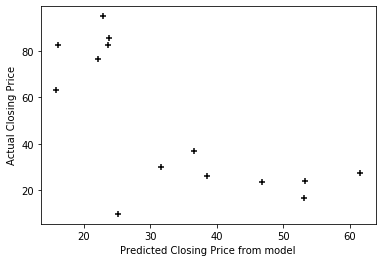

In [569]:
lm_plot(Nike)

In [540]:
lm_twitter(Disneydf)

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.722
Model:                            OLS   Adj. R-squared (uncentered):              0.629
Method:                 Least Squares   F-statistic:                              7.778
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                     0.00248
Time:                        03:33:58   Log-Likelihood:                         -76.164
No. Observations:                  16   AIC:                                      160.3
Df Residuals:                      12   BIC:                                      163.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Favoritesdb     0.1886      0.836      0.225      0.825      -1.634       2.011
Retweetsdb     -0.2623      0.921     -0.285      0.781      -2.269       1.745
Googledb        0.6522      0.288      2.265      0.043       0.025       1.280
Sentimentdb     0.1354      0.197      0.686      0.505      -0.294       0.565
==============================================================================
Omnibus:                        0.227   Durbin-Watson:                   0.730
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.051
Skew:                           0.095   Prob(JB):                        0.975
Kurtosis:                       2.801   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

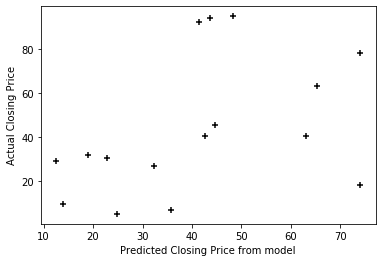

In [571]:
lm_plot(Disneydf)

In [434]:
lm_twitter(Googledf)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.852
Method:                 Least Squares   F-statistic:                              24.08
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                    1.17e-05
Time:                        01:58:39   Log-Likelihood:                         -70.855
No. Observations:                  16   AIC:                                      149.7
Df Residuals:                      12   BIC:                                      152.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Favoritesdb    -0.4298      1.788     -0.240      0.814      -4.326       3.466
Retweetsdb      0.6450      1.672      0.386      0.706      -2.999       4.289
Googledb        0.1640      0.182      0.902      0.385      -0.232       0.560
Sentimentdb     0.6510      0.211      3.080      0.010       0.190       1.112
==============================================================================
Omnibus:                        2.318   Durbin-Watson:                   0.665
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.522
Skew:                          -0.744   Prob(JB):                        0.467
Kurtosis:                       2.734   Cond. No.                         42.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

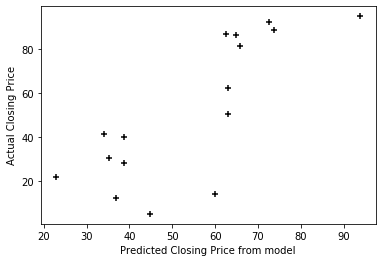

In [572]:
lm_plot(Googledf)

In [435]:
lm_twitter(Microsoftdf)

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.651
Method:                 Least Squares   F-statistic:                              8.007
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                     0.00281
Time:                        01:58:39   Log-Likelihood:                         -67.991
No. Observations:                  15   AIC:                                      144.0
Df Residuals:                      11   BIC:                                      146.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Favoritesdb    -0.5424      0.478     -1.136      0.280      -1.594       0.509
Retweetsdb      0.9397      0.363      2.592      0.025       0.142       1.738
Googledb        0.3109      0.308      1.009      0.335      -0.367       0.989
Sentimentdb     0.4405      0.384      1.147      0.276      -0.405       1.286
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   0.957
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.605
Skew:                           0.354   Prob(JB):                        0.739
Kurtosis:                       2.317   Cond. No.                         8.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

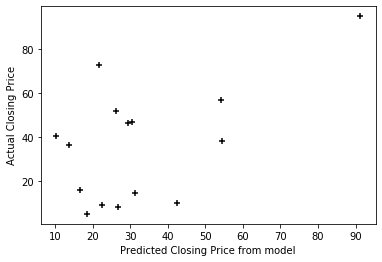

In [573]:
lm_plot(Microsoftdf)

In [436]:
lm_twitter(Inteldf)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              13.14
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                    0.000243
Time:                        01:58:41   Log-Likelihood:                         -73.695
No. Observations:                  16   AIC:                                      155.4
Df Residuals:                      12   BIC:                                      158.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Favoritesdb    -1.5167      1.350     -1.124      0.283      -4.457       1.424
Retweetsdb      1.7258      1.321      1.306      0.216      -1.153       4.604
Googledb        0.4397      0.268      1.638      0.127      -0.145       1.024
Sentimentdb     0.5151      0.269      1.913      0.080      -0.072       1.102
==============================================================================
Omnibus:                        2.787   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                1.116
Skew:                           0.056   Prob(JB):                        0.572
Kurtosis:                       1.711   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

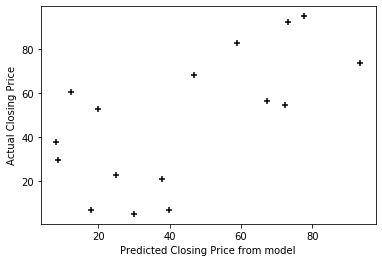

In [574]:
lm_plot(Inteldf)

In [437]:
lm_twitter(Appledf)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     3.525
Date:                Wed, 18 Dec 2019   Prob (F-statistic):             0.0598
Time:                        01:58:42   Log-Likelihood:                -69.718
No. Observations:                  16   AIC:                             145.4
Df Residuals:                      13   BIC:                             147.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Favoritesdb     1.8115      1.678      1.079      0.300      -1.814       5.437
Retweetsdb      1.8115      1.678      1.079      0.300      -1.814       5.437
Googledb       -0.4663      0.247     -1.885      0.082      -1.001       0.068
Sentimentdb     0.4588      0.204      2.251      0.042       0.019       0.899
==============================================================================
Omnibus:                        0.577   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.291
Skew:                          -0.312   Prob(JB):                        0.864
Kurtosis:                       2.779   Cond. No.                     1.59e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.82e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

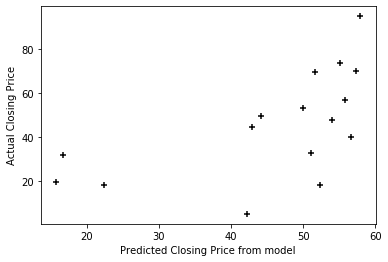

In [575]:
lm_plot(Appledf)

In [449]:
lm_twitter(Cocacoladf)

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.845
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              16.38
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                    8.35e-05
Time:                        02:11:16   Log-Likelihood:                         -74.494
No. Observations:                  16   AIC:                                      157.0
Df Residuals:                      12   BIC:                                      160.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Favoritesdb     0.4137      0.539      0.767      0.458      -0.761       1.588
Retweetsdb      0.1922      0.558      0.345      0.736      -1.023       1.407
Googledb        0.8711      0.182      4.789      0.000       0.475       1.267
Sentimentdb    -0.5897      0.315     -1.874      0.086      -1.275       0.096
==============================================================================
Omnibus:                        6.047   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                3.400
Skew:                           1.075   Prob(JB):                        0.183
Kurtosis:                       3.694   Cond. No.                         7.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

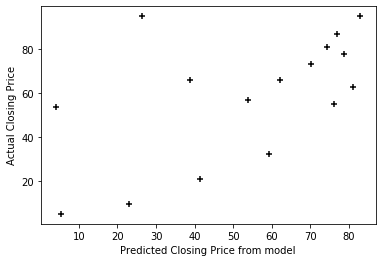

In [577]:
lm_plot(Cocacoladf)

In [462]:
lm_twitter(Amazondf)

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              6.404
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                     0.00802
Time:                        02:33:28   Log-Likelihood:                         -64.561
No. Observations:                  14   AIC:                                      137.1
Df Residuals:                      10   BIC:                                      139.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Favoritesdb     0.5858      1.002      0.585      0.572      -1.646       2.818
Retweetsdb     -0.7144      0.969     -0.737      0.478      -2.874       1.445
Googledb        0.1170      0.489      0.239      0.816      -0.972       1.206
Sentimentdb     0.5250      0.252      2.083      0.064      -0.037       1.087
==============================================================================
Omnibus:                        3.468   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                1.972
Skew:                           0.919   Prob(JB):                        0.373
Kurtosis:                       2.969   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

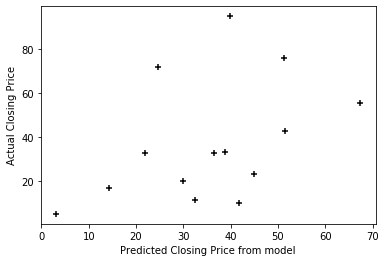

In [578]:
lm_plot(Amazondf)

In [497]:
lm_twitter(Targetdf)

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              13.85
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                    0.000189
Time:                        03:09:29   Log-Likelihood:                         -73.677
No. Observations:                  16   AIC:                                      155.4
Df Residuals:                      12   BIC:                                      158.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Favoritesdb     1.1395      0.424      2.690      0.020       0.216       2.063
Retweetsdb      0.8294      0.296      2.806      0.016       0.185       1.473
Googledb        0.0138      0.270      0.051      0.960      -0.574       0.601
Sentimentdb     0.1065      0.359      0.296      0.772      -0.676       0.889
==============================================================================
Omnibus:                        0.874   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.377
Skew:                           0.372   Prob(JB):                        0.828
Kurtosis:                       2.887   Cond. No.                         4.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

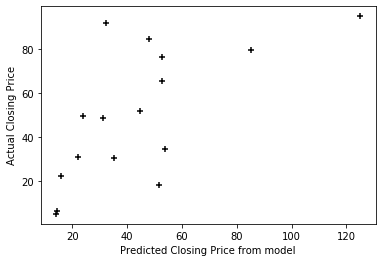

In [579]:
lm_plot(Targetdf)

In [498]:
lm_twitter(Verizondf)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.459
Method:                 Least Squares   F-statistic:                              4.400
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                      0.0203
Time:                        03:09:51   Log-Likelihood:                         -81.862
No. Observations:                  16   AIC:                                      171.7
Df Residuals:                      12   BIC:                                      174.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Favoritesdb     0.5499      0.593      0.928      0.372      -0.742       1.842
Retweetsdb      0.5821      0.558      1.043      0.318      -0.634       1.798
Googledb        0.1843      0.473      0.389      0.704      -0.847       1.216
Sentimentdb     0.4852      0.326      1.486      0.163      -0.226       1.197
==============================================================================
Omnibus:                        1.248   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                0.794
Skew:                          -0.064   Prob(JB):                        0.672
Kurtosis:                       1.916   Cond. No.                         3.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

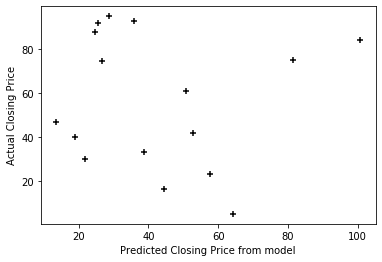

In [580]:
lm_plot(Verizondf)

In [581]:
topten = pd.concat([Nike, Googledf, Disneydf, Microsoftdf, Inteldf, Appledf, Cocacoladf, Amazondf, Targetdf, Verizondf])

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [607]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
topten["Color"] = scaler.fit_transform(topten[["Close"]])      

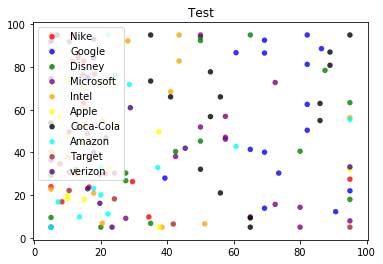

In [499]:
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(Nike["Googledb"],Nike["Close"] , alpha=0.8, color = "red", edgecolors='none', s=30, label="Nike")
ax.scatter(Googledf["Googledb"],Googledf["Close"] , alpha=0.8, color = "blue", edgecolors='none', s=30, label="Google")
ax.scatter(Disneydf["Googledb"],Disneydf["Close"] , alpha=0.8, color =  "green", edgecolors='none', s=30, label="Disney")
ax.scatter(Microsoftdf["Googledb"], Microsoftdf["Close"] , alpha=0.8, color =  "purple", edgecolors='none', s=30, label="Microsoft")
ax.scatter(Inteldf["Googledb"], Inteldf["Close"] , alpha=0.8, color =  "orange", edgecolors='none', s=30, label="Intel")
ax.scatter(Appledf["Googledb"], Appledf["Close"] , alpha=0.8, color =  "yellow", edgecolors='none', s=30, label="Apple")
ax.scatter(Cocacoladf["Googledb"], Cocacoladf["Close"] , alpha=0.8, color =  "Black", edgecolors='none', s=30, label="Coca-Cola")
ax.scatter(Amazondf["Googledb"], Amazondf["Close"] , alpha=0.8, color =  "cyan", edgecolors='none', s=30, label="Amazon")
ax.scatter(Targetdf["Googledb"], Targetdf["Close"] , alpha=0.8, color =  "brown", edgecolors='none', s=30, label="Target")
ax.scatter(Verizondf["Googledb"], Verizondf["Close"] , alpha=0.8, color =  "indigo", edgecolors='none', s=30, label="verizon")


plt.title('Test')
plt.legend(loc=2)
plt.show()

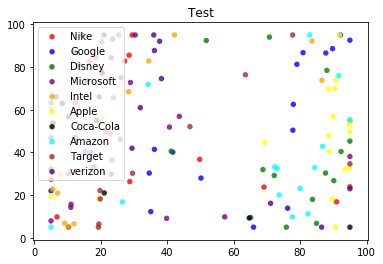

In [500]:
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(Nike["Sentimentdb"],Nike["Close"] , alpha=0.8, color = "red", edgecolors='none', s=30, label="Nike")
ax.scatter(Googledf["Sentimentdb"],Googledf["Close"] , alpha=0.8, color = "blue", edgecolors='none', s=30, label="Google")
ax.scatter(Disneydf["Sentimentdb"],Disneydf["Close"] , alpha=0.8, color =  "green", edgecolors='none', s=30, label="Disney")
ax.scatter(Microsoftdf["Sentimentdb"], Microsoftdf["Close"] , alpha=0.8, color =  "purple", edgecolors='none', s=30, label="Microsoft")
ax.scatter(Inteldf["Sentimentdb"], Inteldf["Close"] , alpha=0.8, color =  "orange", edgecolors='none', s=30, label="Intel")
ax.scatter(Appledf["Sentimentdb"], Appledf["Close"] , alpha=0.8, color =  "yellow", edgecolors='none', s=30, label="Apple")
ax.scatter(Cocacoladf["Sentimentdb"], Cocacoladf["Close"] , alpha=0.8, color =  "Black", edgecolors='none', s=30, label="Coca-Cola")
ax.scatter(Amazondf["Sentimentdb"], Amazondf["Close"] , alpha=0.8, color =  "cyan", edgecolors='none', s=30, label="Amazon")
ax.scatter(Targetdf["Sentimentdb"], Targetdf["Close"] , alpha=0.8, color =  "brown", edgecolors='none', s=30, label="Target")
ax.scatter(Verizondf["Sentimentdb"], Verizondf["Close"] , alpha=0.8, color =  "indigo", edgecolors='none', s=30, label="verizon")


plt.title('Test')
plt.legend(loc=2)
plt.show()

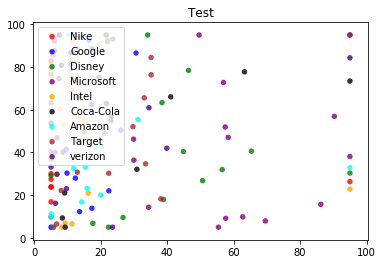

In [501]:
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(Nike["Favoritesdb"],Nike["Close"] , alpha=0.8, color = "red", edgecolors='none', s=30, label="Nike")
ax.scatter(Googledf["Favoritesdb"],Googledf["Close"] , alpha=0.8, color = "blue", edgecolors='none', s=30, label="Google")
ax.scatter(Disneydf["Favoritesdb"],Disneydf["Close"] , alpha=0.8, color =  "green", edgecolors='none', s=30, label="Disney")
ax.scatter(Microsoftdf["Favoritesdb"], Microsoftdf["Close"] , alpha=0.8, color =  "purple", edgecolors='none', s=30, label="Microsoft")
ax.scatter(Inteldf["Favoritesdb"], Inteldf["Close"] , alpha=0.8, color =  "orange", edgecolors='none', s=30, label="Intel")
ax.scatter(Cocacoladf["Favoritesdb"], Cocacoladf["Close"] , alpha=0.8, color =  "Black", edgecolors='none', s=30, label="Coca-Cola")
ax.scatter(Amazondf["Favoritesdb"], Amazondf["Close"] , alpha=0.8, color =  "cyan", edgecolors='none', s=30, label="Amazon")
ax.scatter(Targetdf["Favoritesdb"], Targetdf["Close"] , alpha=0.8, color =  "brown", edgecolors='none', s=30, label="Target")
ax.scatter(Verizondf["Favoritesdb"], Verizondf["Close"] , alpha=0.8, color =  "indigo", edgecolors='none', s=30, label="verizon")


plt.title('Test')
plt.legend(loc=2)
plt.show()

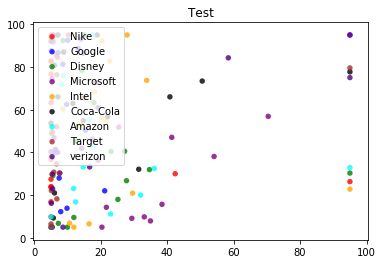

In [502]:
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(Nike["Retweetsdb"],Nike["Close"] , alpha=0.8, color = "red", edgecolors='none', s=30, label="Nike")
ax.scatter(Googledf["Retweetsdb"],Googledf["Close"] , alpha=0.8, color = "blue", edgecolors='none', s=30, label="Google")
ax.scatter(Disneydf["Retweetsdb"],Disneydf["Close"] , alpha=0.8, color =  "green", edgecolors='none', s=30, label="Disney")
ax.scatter(Microsoftdf["Retweetsdb"], Microsoftdf["Close"] , alpha=0.8, color =  "purple", edgecolors='none', s=30, label="Microsoft")
ax.scatter(Inteldf["Retweetsdb"], Inteldf["Close"] , alpha=0.8, color =  "orange", edgecolors='none', s=30, label="Intel")
ax.scatter(Cocacoladf["Retweetsdb"], Cocacoladf["Close"] , alpha=0.8, color =  "Black", edgecolors='none', s=30, label="Coca-Cola")
ax.scatter(Amazondf["Retweetsdb"], Amazondf["Close"] , alpha=0.8, color =  "cyan", edgecolors='none', s=30, label="Amazon")
ax.scatter(Targetdf["Retweetsdb"], Targetdf["Close"] , alpha=0.8, color =  "brown", edgecolors='none', s=30, label="Target")
ax.scatter(Verizondf["Retweetsdb"], Verizondf["Close"] , alpha=0.8, color =  "indigo", edgecolors='none', s=30, label="verizon")


plt.title('Test')
plt.legend(loc=2)
plt.show()

In [503]:
Googleplot = pd.DataFrame({"GoogleX": Googledf["Googledb"], "GoogleY": Googledf["Sentimentdb"], "GoogleZ": Googledf["Retweetsdb"]})
Disneyplot = pd.DataFrame({"DisneyX": Disneydf["Googledb"], "DisneyY": Disneydf["Sentimentdb"], "DisneyZ": Disneydf["Retweetsdb"]})
Nikeplot = pd.DataFrame({"NikeX": Nike["Googledb"], "NikeY": Nike["Sentimentdb"], "NikeZ": Nike["Retweetsdb"]})
Microsoftplot = pd.DataFrame({"MicrosoftX": Microsoftdf["Googledb"], "MicrosoftY": Microsoftdf["Sentimentdb"], "MicrosoftZ": Microsoftdf["Retweetsdb"]})
Intelplot = pd.DataFrame({"IntelX": Inteldf["Googledb"], "IntelY": Inteldf["Sentimentdb"], "IntelZ": Inteldf["Retweetsdb"]})
Appleplot = pd.DataFrame({"AppleX": Appledf["Googledb"], "AppleY": Appledf["Sentimentdb"], "AppleZ": Appledf["Retweetsdb"]})
Cocacolaplot = pd.DataFrame({"CocacolaX": Cocacoladf["Googledb"], "CocacolaY": Cocacoladf["Sentimentdb"], "CocacolaZ": Cocacoladf["Retweetsdb"]})
Amazonplot = pd.DataFrame({"AmazonX": Amazondf["Googledb"], "AmazonY": Amazondf["Sentimentdb"], "AmazonZ": Amazondf["Retweetsdb"]})
Verizonplot = pd.DataFrame({"VerizonX": Verizondf["Googledb"], "VerizonY": Verizondf["Sentimentdb"], "VerizonZ": Verizondf["Retweetsdb"]})
Targetplot = pd.DataFrame({"TargetX": Targetdf["Googledb"], "TargetY": Targetdf["Sentimentdb"], "TargetZ": Targetdf["Retweetsdb"]})



for df in (Googleplot, Disneyplot, Nikeplot, Microsoftplot, Intelplot):
    for n in range(0, 2):
        df.iloc[:, n] = df.iloc[:, n] * 100 / df.sum(axis=1)
import ternary as tn

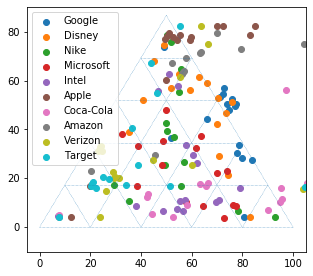

In [505]:
fig, tax = tn.figure(scale=100)
fig.set_size_inches(5, 4.5)

tax.scatter(Googleplot.values, label = "Google")
tax.scatter(Disneyplot.values, label = "Disney")
tax.scatter(Nikeplot.values, label = "Nike")
tax.scatter(Microsoftplot.values, label = "Microsoft")
tax.scatter(Intelplot.values, Label = "Intel")
tax.scatter(Appleplot.values, Label = "Apple")
tax.scatter(Cocacolaplot.values, Label = "Coca-Cola")
tax.scatter(Amazonplot.values, Label = "Amazon")
tax.scatter(Verizonplot.values, Label = "Verizon")
tax.scatter(Targetplot.values, Label = "Target")


tax.gridlines(multiple=20)
tax.get_axes().axis('on')
plt.legend(loc=2)


In [608]:
Topplot = pd.DataFrame({"TopX": topten["Googledb"], "TopY": topten["Sentimentdb"], "TopZ": topten["Retweetsdb"]})

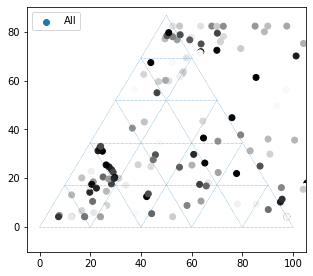

In [617]:
import matplotlib.colors as mcolors
fig, tax = tn.figure(scale=100)
fig.set_size_inches(5, 4.5)
tax.scatter(Topplot.values, Label = "All", c = topten["Color"], cmap = "Greys")
tax.gridlines(multiple=20)
tax.get_axes().axis('on')
plt.legend(loc=2)
